# **Library file dependencies**



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.naive_bayes import GaussianNB as gnb
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [ ]:
import warnings
warnings.filterwarnings('ignore')
%config Completer.use_jedi = False 

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
!pip install text_hammer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 115 kB 21.7 MB/s 
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


# Text Hammer Library  --> **Preprocessing**

In [ ]:
import text_hammer as th

In [ ]:
import seaborn as sns 
import matplotlib.pyplot as plt
import re
from wordcloud import STOPWORDS 
from collections import defaultdict 


In [ ]:
from nltk.corpus import stopwords    
from wordcloud import WordCloud 

# **Mounting the Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Dataset Loading**

In [ ]:
train_data = pd.read_csv('/content/drive/MyDrive/Assam_tweets (2).csv')

In [ ]:
train_data.head(25)

,tweet_id,receiver_id,tweet_text,timestamp,location,name,hashtags,user_mentions
0,1.544307e+18,NaN,"RT @zuckmetaverse: Kabul Khan, Mithu Hussain L...",2022-07-05 13:08:07+00:00,NaN,IndicRWFollower 🇮🇳,[],"[{'screen_name': 'zuckmetaverse', 'name': 'Arj..."
1,1.544307e+18,NaN,RT @the_hindu: President #RamNathKovind called...,2022-07-05 13:08:07+00:00,NaN,MD Shahjad,"[{'text': 'RamNathKovind', 'indices': [25, 39]}]","[{'screen_name': 'the_hindu', 'name': 'The Hin..."
2,1.544307e+18,NaN,RT @RatanSharda55: While we are debating #Amra...,2022-07-05 13:08:06+00:00,"Gujarat, India",બ્રિજેશ પટેલ Brijesh Patel,"[{'text': 'Amravati', 'indices': [41, 50]}, {'...","[{'screen_name': 'RatanSharda55', 'name': 'Rat..."
3,1.544307e+18,NaN,RT @AbhishBanerj: Why is this not biggest news...,2022-07-05 13:08:02+00:00,"Delhi, India",Apoorv Tyagi,[],"[{'screen_name': 'AbhishBanerj', 'name': 'Abhi..."
4,1.544307e+18,NaN,"RT @ErayCr: So, Assam floods—that claimed 170+...",2022-07-05 13:08:01+00:00,NaN,anon,[],"[{'screen_name': 'ErayCr', 'name': 'Eray Mridu..."
5,1.544307e+18,NaN,RT @RatanSharda55: While we are debating #Amra...,2022-07-05 13:07:54+00:00,Bharat,Dubious crime,"[{'text': 'Amravati', 'indices': [41, 50]}, {'...","[{'screen_name': 'RatanSharda55', 'name': 'Rat..."
6,1.544307e+18,NaN,"RT @arunpudur: Assam : Kabul Khan, Mithu Hussa...",2022-07-05 13:07:51+00:00,NaN,1-2 Ka 4,[],"[{'screen_name': 'arunpudur', 'name': 'Arun Pu..."
7,1.544307e+18,NaN,RT @ByRakeshSimha: Flood jehad\n\nAssam Police...,2022-07-05 13:07:43+00:00,NaN,imshreeyash,[],"[{'screen_name': 'ByRakeshSimha', 'name': 'Rak..."
8,1.544307e+18,NaN,RT @AbhishBanerj: Why is this not biggest news...,2022-07-05 13:07:33+00:00,NaN,honeysonujain,[],"[{'screen_name': 'AbhishBanerj', 'name': 'Abhi..."
9,1.544307e+18,NaN,RT @RatanSharda55: While we are debating #Amra...,2022-07-05 13:07:33+00:00,"Raipur, India",Arjun,"[{'text': 'Amravati', 'indices': [41, 50]}, {'...","[{'screen_name': 'RatanSharda55', 'name': 'Rat..."


# **Defining Text preprocessing using text hammar**

In [ ]:
def text_preprocessing(df,col_name):   # defining the text preprocessing with column name
    column = col_name
    df[column] = df[column].progress_apply(lambda x:str(x).lower())  # defining the specified columns with lower case
    df[column] = df[column].progress_apply(lambda x: th.remove_emails(x))   # helps to remove the email id
    df[column] = df[column].progress_apply(lambda x: th.remove_html_tags(x))   # helps to remove the htmal tags
    df[column] = df[column].progress_apply(lambda x: th.remove_special_chars(x))  # helps to remove the special characters
    df[column] = df[column].progress_apply(lambda x: th.remove_accented_chars(x)) # helps to remove the shortcut keywords
    return(df)

# **Data Preprocessing**

In [ ]:
train_data = text_preprocessing(train_data,'tweet_text')

  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

# **Vader Sentiment Analysis**

In [ ]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download("vader_lexicon")
import pandas as pd

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
sentiments = SentimentIntensityAnalyzer()
train_data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in train_data["tweet_text"]]
train_data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in train_data["tweet_text"]]
train_data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in train_data["tweet_text"]]
train_data['Compound'] = [sentiments.polarity_scores(i)["compound"] for i in train_data["tweet_text"]]
train_data.head(25)

,tweet_id,receiver_id,tweet_text,timestamp,location,name,hashtags,user_mentions,Positive,Negative,Neutral,Compound
0,1.544307e+18,NaN,rt zuckmetaverse kabul khan mithu hussain lask...,2022-07-05 13:08:07+00:00,NaN,IndicRWFollower 🇮🇳,[],"[{'screen_name': 'zuckmetaverse', 'name': 'Arj...",0.00,0.109,0.891,-0.2960
1,1.544307e+18,NaN,rt the_hindu president ramnathkovind called as...,2022-07-05 13:08:07+00:00,NaN,MD Shahjad,"[{'text': 'RamNathKovind', 'indices': [25, 39]}]","[{'screen_name': 'the_hindu', 'name': 'The Hin...",0.00,0.000,1.000,0.0000
2,1.544307e+18,NaN,rt ratansharda55 while we are debating amravat...,2022-07-05 13:08:06+00:00,"Gujarat, India",બ્રિજેશ પટેલ Brijesh Patel,"[{'text': 'Amravati', 'indices': [41, 50]}, {'...","[{'screen_name': 'RatanSharda55', 'name': 'Rat...",0.00,0.291,0.709,-0.7506
3,1.544307e+18,NaN,rt abhishbanerj why is this not biggest news i...,2022-07-05 13:08:02+00:00,"Delhi, India",Apoorv Tyagi,[],"[{'screen_name': 'AbhishBanerj', 'name': 'Abhi...",0.00,0.145,0.855,-0.5267
4,1.544307e+18,NaN,rt eraycr so assam floodsthat claimed 170 live...,2022-07-05 13:08:01+00:00,NaN,anon,[],"[{'screen_name': 'ErayCr', 'name': 'Eray Mridu...",0.00,0.214,0.786,-0.6007
5,1.544307e+18,NaN,rt ratansharda55 while we are debating amravat...,2022-07-05 13:07:54+00:00,Bharat,Dubious crime,"[{'text': 'Amravati', 'indices': [41, 50]}, {'...","[{'screen_name': 'RatanSharda55', 'name': 'Rat...",0.00,0.291,0.709,-0.7506
6,1.544307e+18,NaN,rt arunpudur assam kabul khan mithu hussain la...,2022-07-05 13:07:51+00:00,NaN,1-2 Ka 4,[],"[{'screen_name': 'arunpudur', 'name': 'Arun Pu...",0.00,0.252,0.748,-0.7506
7,1.544307e+18,NaN,rt byrakeshsimha flood jehadassam police have ...,2022-07-05 13:07:43+00:00,NaN,imshreeyash,[],"[{'screen_name': 'ByRakeshSimha', 'name': 'Rak...",0.00,0.291,0.709,-0.8126
8,1.544307e+18,NaN,rt abhishbanerj why is this not biggest news i...,2022-07-05 13:07:33+00:00,NaN,honeysonujain,[],"[{'screen_name': 'AbhishBanerj', 'name': 'Abhi...",0.00,0.145,0.855,-0.5267
9,1.544307e+18,NaN,rt ratansharda55 while we are debating amravat...,2022-07-05 13:07:33+00:00,"Raipur, India",Arjun,"[{'text': 'Amravati', 'indices': [41, 50]}, {'...","[{'screen_name': 'RatanSharda55', 'name': 'Rat...",0.00,0.291,0.709,-0.7506


# **Removing Neutral Sentiment**

In [ ]:
train_data.drop(train_data.index[train_data['Compound'] == 0.0000], inplace = True)

In [ ]:
train_data

,tweet_id,receiver_id,tweet_text,timestamp,location,name,hashtags,user_mentions,Positive,Negative,Neutral,Compound
0,1.544307e+18,NaN,rt zuckmetaverse kabul khan mithu hussain lask...,2022-07-05 13:08:07+00:00,NaN,IndicRWFollower 🇮🇳,[],"[{'screen_name': 'zuckmetaverse', 'name': 'Arj...",0.00,0.109,0.891,-0.2960
2,1.544307e+18,NaN,rt ratansharda55 while we are debating amravat...,2022-07-05 13:08:06+00:00,"Gujarat, India",બ્રિજેશ પટેલ Brijesh Patel,"[{'text': 'Amravati', 'indices': [41, 50]}, {'...","[{'screen_name': 'RatanSharda55', 'name': 'Rat...",0.00,0.291,0.709,-0.7506
3,1.544307e+18,NaN,rt abhishbanerj why is this not biggest news i...,2022-07-05 13:08:02+00:00,"Delhi, India",Apoorv Tyagi,[],"[{'screen_name': 'AbhishBanerj', 'name': 'Abhi...",0.00,0.145,0.855,-0.5267
4,1.544307e+18,NaN,rt eraycr so assam floodsthat claimed 170 live...,2022-07-05 13:08:01+00:00,NaN,anon,[],"[{'screen_name': 'ErayCr', 'name': 'Eray Mridu...",0.00,0.214,0.786,-0.6007
5,1.544307e+18,NaN,rt ratansharda55 while we are debating amravat...,2022-07-05 13:07:54+00:00,Bharat,Dubious crime,"[{'text': 'Amravati', 'indices': [41, 50]}, {'...","[{'screen_name': 'RatanSharda55', 'name': 'Rat...",0.00,0.291,0.709,-0.7506
...,...,...,...,...,...,...,...,...,...,...,...,...
19995,1.542897e+18,NaN,rt simranb42671851 we all raised our voices wi...,2022-07-01 15:44:58+00:00,NaN,Vikas Chaurasiya,[],"[{'screen_name': 'SimranB42671851', 'name': 'S...",0.06,0.073,0.867,-0.0819
19996,1.542897e+18,NaN,rt simranb42671851 we all raised our voices wi...,2022-07-01 15:44:57+00:00,NaN,Palak,[],"[{'screen_name': 'SimranB42671851', 'name': 'S...",0.06,0.073,0.867,-0.0819
19997,1.542897e+18,NaN,rt simranb42671851 we all raised our voices wi...,2022-07-01 15:44:55+00:00,NaN,YASH GAMING,[],"[{'screen_name': 'SimranB42671851', 'name': 'S...",0.06,0.073,0.867,-0.0819
19998,1.542897e+18,NaN,rt simranb42671851 we all raised our voices wi...,2022-07-01 15:44:50+00:00,"Jharkhand, India",The Pankaj Yadav,[],"[{'screen_name': 'SimranB42671851', 'name': 'S...",0.06,0.073,0.867,-0.0819


In [ ]:
score = train_data["Compound"].values
sentiment = []

for i in score:
    if i > 0.05 :
        sentiment.append('Positive')
      
  
    else:
        sentiment.append('Negative')
       
train_data["Sentiment"] = sentiment
train_data.head(10)

,tweet_id,receiver_id,tweet_text,timestamp,location,name,hashtags,user_mentions,Positive,Negative,Neutral,Compound,Sentiment
0,1.544307e+18,NaN,rt zuckmetaverse kabul khan mithu hussain lask...,2022-07-05 13:08:07+00:00,NaN,IndicRWFollower 🇮🇳,[],"[{'screen_name': 'zuckmetaverse', 'name': 'Arj...",0.0,0.109,0.891,-0.2960,Negative
2,1.544307e+18,NaN,rt ratansharda55 while we are debating amravat...,2022-07-05 13:08:06+00:00,"Gujarat, India",બ્રિજેશ પટેલ Brijesh Patel,"[{'text': 'Amravati', 'indices': [41, 50]}, {'...","[{'screen_name': 'RatanSharda55', 'name': 'Rat...",0.0,0.291,0.709,-0.7506,Negative
3,1.544307e+18,NaN,rt abhishbanerj why is this not biggest news i...,2022-07-05 13:08:02+00:00,"Delhi, India",Apoorv Tyagi,[],"[{'screen_name': 'AbhishBanerj', 'name': 'Abhi...",0.0,0.145,0.855,-0.5267,Negative
4,1.544307e+18,NaN,rt eraycr so assam floodsthat claimed 170 live...,2022-07-05 13:08:01+00:00,NaN,anon,[],"[{'screen_name': 'ErayCr', 'name': 'Eray Mridu...",0.0,0.214,0.786,-0.6007,Negative
5,1.544307e+18,NaN,rt ratansharda55 while we are debating amravat...,2022-07-05 13:07:54+00:00,Bharat,Dubious crime,"[{'text': 'Amravati', 'indices': [41, 50]}, {'...","[{'screen_name': 'RatanSharda55', 'name': 'Rat...",0.0,0.291,0.709,-0.7506,Negative
6,1.544307e+18,NaN,rt arunpudur assam kabul khan mithu hussain la...,2022-07-05 13:07:51+00:00,NaN,1-2 Ka 4,[],"[{'screen_name': 'arunpudur', 'name': 'Arun Pu...",0.0,0.252,0.748,-0.7506,Negative
7,1.544307e+18,NaN,rt byrakeshsimha flood jehadassam police have ...,2022-07-05 13:07:43+00:00,NaN,imshreeyash,[],"[{'screen_name': 'ByRakeshSimha', 'name': 'Rak...",0.0,0.291,0.709,-0.8126,Negative
8,1.544307e+18,NaN,rt abhishbanerj why is this not biggest news i...,2022-07-05 13:07:33+00:00,NaN,honeysonujain,[],"[{'screen_name': 'AbhishBanerj', 'name': 'Abhi...",0.0,0.145,0.855,-0.5267,Negative
9,1.544307e+18,NaN,rt ratansharda55 while we are debating amravat...,2022-07-05 13:07:33+00:00,"Raipur, India",Arjun,"[{'text': 'Amravati', 'indices': [41, 50]}, {'...","[{'screen_name': 'RatanSharda55', 'name': 'Rat...",0.0,0.291,0.709,-0.7506,Negative
10,1.544307e+18,NaN,rt ratansharda55 while we are debating amravat...,2022-07-05 13:07:21+00:00,Bharat,अवधूत,"[{'text': 'Amravati', 'indices': [41, 50]}, {'...","[{'screen_name': 'RatanSharda55', 'name': 'Rat...",0.0,0.291,0.709,-0.7506,Negative


# **Data Labeling**

In [ ]:
train_data['label'] = pd.Series([1.0,0.0])
train_data["label"].loc[train_data["Sentiment"]=="Positive"]=1.0
train_data["label"].loc[train_data["Sentiment"]=="Negative"]=0.0
train_data

,tweet_id,receiver_id,tweet_text,timestamp,location,name,hashtags,user_mentions,Positive,Negative,Neutral,Compound,Sentiment,label
0,1.544307e+18,NaN,rt zuckmetaverse kabul khan mithu hussain lask...,2022-07-05 13:08:07+00:00,NaN,IndicRWFollower 🇮🇳,[],"[{'screen_name': 'zuckmetaverse', 'name': 'Arj...",0.00,0.109,0.891,-0.2960,Negative,0.0
2,1.544307e+18,NaN,rt ratansharda55 while we are debating amravat...,2022-07-05 13:08:06+00:00,"Gujarat, India",બ્રિજેશ પટેલ Brijesh Patel,"[{'text': 'Amravati', 'indices': [41, 50]}, {'...","[{'screen_name': 'RatanSharda55', 'name': 'Rat...",0.00,0.291,0.709,-0.7506,Negative,0.0
3,1.544307e+18,NaN,rt abhishbanerj why is this not biggest news i...,2022-07-05 13:08:02+00:00,"Delhi, India",Apoorv Tyagi,[],"[{'screen_name': 'AbhishBanerj', 'name': 'Abhi...",0.00,0.145,0.855,-0.5267,Negative,0.0
4,1.544307e+18,NaN,rt eraycr so assam floodsthat claimed 170 live...,2022-07-05 13:08:01+00:00,NaN,anon,[],"[{'screen_name': 'ErayCr', 'name': 'Eray Mridu...",0.00,0.214,0.786,-0.6007,Negative,0.0
5,1.544307e+18,NaN,rt ratansharda55 while we are debating amravat...,2022-07-05 13:07:54+00:00,Bharat,Dubious crime,"[{'text': 'Amravati', 'indices': [41, 50]}, {'...","[{'screen_name': 'RatanSharda55', 'name': 'Rat...",0.00,0.291,0.709,-0.7506,Negative,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,1.542897e+18,NaN,rt simranb42671851 we all raised our voices wi...,2022-07-01 15:44:58+00:00,NaN,Vikas Chaurasiya,[],"[{'screen_name': 'SimranB42671851', 'name': 'S...",0.06,0.073,0.867,-0.0819,Negative,0.0
19996,1.542897e+18,NaN,rt simranb42671851 we all raised our voices wi...,2022-07-01 15:44:57+00:00,NaN,Palak,[],"[{'screen_name': 'SimranB42671851', 'name': 'S...",0.06,0.073,0.867,-0.0819,Negative,0.0
19997,1.542897e+18,NaN,rt simranb42671851 we all raised our voices wi...,2022-07-01 15:44:55+00:00,NaN,YASH GAMING,[],"[{'screen_name': 'SimranB42671851', 'name': 'S...",0.06,0.073,0.867,-0.0819,Negative,0.0
19998,1.542897e+18,NaN,rt simranb42671851 we all raised our voices wi...,2022-07-01 15:44:50+00:00,"Jharkhand, India",The Pankaj Yadav,[],"[{'screen_name': 'SimranB42671851', 'name': 'S...",0.06,0.073,0.867,-0.0819,Negative,0.0


# **Positive Tweets**

In [ ]:
train_data[train_data.label == 1.0]

,tweet_id,receiver_id,tweet_text,timestamp,location,name,hashtags,user_mentions,Positive,Negative,Neutral,Compound,Sentiment,label
30,1.544307e+18,NaN,rt carbon_stink my story for the newhumanitari...,2022-07-05 13:05:48+00:00,NaN,SILICON 27,[],"[{'screen_name': 'carbon_stink', 'name': 'Aatr...",0.095,0.000,0.905,0.2732,Positive,1.0
43,1.544306e+18,NaN,rt hardeepspuri truly inspirationaldelivering ...,2022-07-05 13:04:51+00:00,"Navi Mumbai, India",Suresh Nair,"[{'text': 'Assam', 'indices': [107, 113]}]","[{'screen_name': 'HardeepSPuri', 'name': 'Hard...",0.262,0.173,0.565,0.2960,Positive,1.0
75,1.544306e+18,NaN,rt carbon_stink my story for the newhumanitari...,2022-07-05 13:02:29+00:00,"New Delhi, India",Vijayta Lalwani,[],"[{'screen_name': 'carbon_stink', 'name': 'Aatr...",0.095,0.000,0.905,0.2732,Positive,1.0
113,1.544305e+18,NaN,rt carbon_stink my story for the newhumanitari...,2022-07-05 12:59:15+00:00,"Houston, TX",LadyLisaDCantu,[],"[{'screen_name': 'carbon_stink', 'name': 'Aatr...",0.095,0.000,0.905,0.2732,Positive,1.0
123,1.544305e+18,NaN,rt aghastya7jain there has been a catatrophic ...,2022-07-05 12:58:56+00:00,NaN,venkatR,[],"[{'screen_name': 'Aghastya7jain', 'name': '𝗔𝗴𝗵...",0.190,0.000,0.810,0.5719,Positive,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19858,1.542903e+18,NaN,rt hemkunt_fdn day 7 assamfloods the relief ca...,2022-07-01 16:09:47+00:00,"odisha, India",Prabhat,"[{'text': 'AssamFloods', 'indices': [23, 35]}]","[{'screen_name': 'Hemkunt_Fdn', 'name': 'Hemku...",0.117,0.087,0.795,0.2023,Positive,1.0
19882,1.542901e+18,NaN,rt hemkunt_fdn day 7 assamfloods the relief ca...,2022-07-01 15:59:07+00:00,"Garden Grove, CA",Gonveer Johal,"[{'text': 'AssamFloods', 'indices': [23, 35]}]","[{'screen_name': 'Hemkunt_Fdn', 'name': 'Hemku...",0.117,0.087,0.795,0.2023,Positive,1.0
19884,1.542900e+18,NaN,rt hemkunt_fdn day 7 assamfloods the relief ca...,2022-07-01 15:58:31+00:00,"New Delhi, India",Surinder Singh Suri,"[{'text': 'AssamFloods', 'indices': [23, 35]}]","[{'screen_name': 'Hemkunt_Fdn', 'name': 'Hemku...",0.117,0.087,0.795,0.2023,Positive,1.0
19897,1.542900e+18,NaN,rt tejasvi_surya pm shri narendramodi ji cm hi...,2022-07-01 15:55:11+00:00,NaN,Shivajit Biswas,[],"[{'screen_name': 'Tejasvi_Surya', 'name': 'Tej...",0.123,0.000,0.877,0.4215,Positive,1.0


# **Tweets label = 1**

> Indented block



In [ ]:
train_data_non_disaster = train_data[train_data['label']== 1]
train_data_non_disaster.shape

(655, 14)

# **Tweets label = 0** 

In [ ]:
train_data_disaster = train_data[train_data['label']== 0]
train_data_disaster.shape

(15923, 14)

# **Resampling**

In [ ]:
from sklearn.utils import resample
train_data_non_disaster_upsample = resample(train_data_non_disaster,
             replace=True,
             n_samples=len(train_data_disaster),
             random_state=42)

# **DownSampling**

In [ ]:
print(train_data_non_disaster_upsample.shape)

(15923, 14)


In [ ]:
train_data_balanced = pd.concat([train_data_non_disaster_upsample,train_data_disaster ])

# **Balanced Data**

In [ ]:
train_data_balanced["tweet_text"].shape

(31846,)

# **X, y value Assignment**

In [ ]:
X = train_data_balanced['tweet_text']

In [ ]:
X

6076     rt upama2001 erpawanbhadana bharatiyateach sir...
18442    rt aitc4assam wonders of the double engine mod...
15317    rt taye_suchen rahulgandhi the youth of assam ...
6222     if the news of assam floods as of embankment b...
3084     rt cchrc_silchar thanks to the tireless effort...
                               ...                        
19995    rt simranb42671851 we all raised our voices wi...
19996    rt simranb42671851 we all raised our voices wi...
19997    rt simranb42671851 we all raised our voices wi...
19998    rt simranb42671851 we all raised our voices wi...
19999    rt simranb42671851 we all raised our voices wi...
Name: tweet_text, Length: 31846, dtype: object

In [ ]:
y = train_data_balanced['label']

In [ ]:
y

6076     1.0
18442    1.0
15317    1.0
6222     1.0
3084     1.0
        ... 
19995    0.0
19996    0.0
19997    0.0
19998    0.0
19999    0.0
Name: label, Length: 31846, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [ ]:
X_train

14       rt abhishbanerj why is this not biggest news i...
12183    rt byrakeshsimha flood jehadassam police have ...
17133    rt mj_007club assam police has arrested 4 indi...
3311     rt abhishbanerj why is this not biggest news i...
11035    rt sumirdh life and livelihood hit hard in ass...
                               ...                        
769      rt opindia_com aapda mein avasar congress uses...
6047     vanickaa one day soon hopefully the floods in ...
12359    rt opindia_com assam mithu hussain laskar and ...
9819     rt sumirdh life and livelihood hit hard in ass...
19227    assam is witnessing one of the worst floods in...
Name: tweet_text, Length: 25476, dtype: object

In [ ]:
y_train

14       0.0
12183    0.0
17133    0.0
3311     0.0
11035    1.0
        ... 
769      1.0
6047     1.0
12359    0.0
9819     1.0
19227    0.0
Name: label, Length: 25476, dtype: float64

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(25476,)
(6370,)
(25476,)
(6370,)


# **Count vector**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
vect = CountVectorizer()

In [ ]:
vect.fit(X_train)

CountVectorizer()

In [ ]:
X_train = vect.fit_transform(X_train)

In [ ]:
X_train

<25476x3215 sparse matrix of type '<class 'numpy.int64'>'
	with 476271 stored elements in Compressed Sparse Row format>

In [ ]:
X_test = vect.transform(X_test)
X_test

<6370x3215 sparse matrix of type '<class 'numpy.int64'>'
	with 119105 stored elements in Compressed Sparse Row format>

In [ ]:
y_train

14       0.0
12183    0.0
17133    0.0
3311     0.0
11035    1.0
        ... 
769      1.0
6047     1.0
12359    0.0
9819     1.0
19227    0.0
Name: label, Length: 25476, dtype: float64

In [ ]:
y_test

15131    1.0
17233    0.0
15108    0.0
1270     0.0
3303     0.0
        ... 
19112    1.0
2657     0.0
17213    0.0
7232     0.0
12272    0.0
Name: label, Length: 6370, dtype: float64

# **Defining Confusion Matrix**

In [ ]:
def c_report(y_true,y_pred):
    print("Classifictaion Report")
    print(classification_report(y_true, y_pred))
    acc_scr = accuracy_score(y_true, y_pred)
    print("Accuracy : "+ str(acc_scr))
    return acc_scr

def cm_report(y_true,y_pred):
    fp = confusion_matrix.sum(axis=0) - np.diag(confusion_matrix)  
    fn = confusion_matrix.sum(axis=1) - np.diag(confusion_matrix)
    tp = np.diag(confusion_matrix)
    tn = confusion_matrix - (fp + fn + tp)
    print('True Positive', tp)
    print('True Negative', tn)
    print('False Positive', fp)
    print('False Negative', fn)  


def plot_cm(y_true,y_pred,cmap = "Blues"):
    mtx = confusion_matrix(y_true, y_pred)
    sns.heatmap(mtx, annot = True, fmt='d', linewidth=0.5,
               cmap=cmap, cbar = False)

    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')

# **Performance Metrix**

In [ ]:
def print_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    print('True positive = ', cm[1][1])
    print('False positive = ', cm[0][1])
    print('False negative = ', cm[1][0])
    print('True negative = ', cm[0][0])
    print('Trrue positive rate =', cm[1][1] / (cm[1][1] + cm[1][0])) # Sensitivity, hit rate, recall, or true positive rate TPR = TP/(TP+FN)
    print('Trrue negative rate =', cm[0][0] / (cm[0][0] + cm[0][1]))    # Specificity or true negative rate TNR = TN/(TN+FP) 
    print('Positive Predictive Value =', cm[1][1] / (cm[1][1] + cm[0][1])) # Precision or positive predictive value PPV = TP/(TP+FP)
    print('Negative Predictive Value =', cm[0][0] / (cm[0][0] + cm[1][0]))  # Negative predictive value  NPV = TN/(TN+FN)
    print('False positive rate =', cm[0][1] / (cm[0][1] + cm[0][0]))  # Fall out or false positive rate FPR = FP/(FP+TN)
    print('False negative rate =', cm[1][0] / (cm[1][1] + cm[1][0])) # False negative rate FNR = FN/(TP+FN)
    print('False discovery rate =', cm[0][1] / (cm[1][1] + cm[0][1]))  # False discovery rate FDR = FP/(TP+FP)
    print('Accuracy =', (cm[1][1] + cm[0][0]) / (cm[0][0] + cm[0][1] + cm[1][0] + cm[1][1]))  # Overall accuracy ACC = (TP+TN)/(TP+FP+FN+TN)
    print('F1 score =', ((2* cm[1][1]) / ((2* cm[0][0]) + cm[0][1] + cm[1][0])))  # Overall accuracy ACC = (2* TP)/(2*TP+FP+FN)

# **Support Vector Machine**

The accuracy of the SVM is 99.86


Text(0.5, 1.05, 'Confusion_matrix')

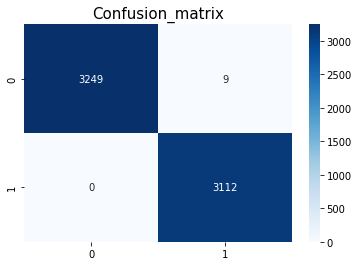

In [ ]:
SVM = svm.SVC(kernel='rbf',gamma='scale',probability=True)
SVM.fit(X_train,y_train)
predictions_SVM = SVM.predict(X_test)
acc_svm = round(accuracy_score(predictions_SVM,y_test)*100,2)


print('The accuracy of the SVM is',acc_svm)


sns.heatmap(confusion_matrix(y_test,predictions_SVM),annot=True,fmt='', cmap='Blues')
plt.title('Confusion_matrix', y=1.05, size=15)


Classifictaion Report
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      3258
         1.0       1.00      1.00      1.00      3112

    accuracy                           1.00      6370
   macro avg       1.00      1.00      1.00      6370
weighted avg       1.00      1.00      1.00      6370

Accuracy : 0.9985871271585557


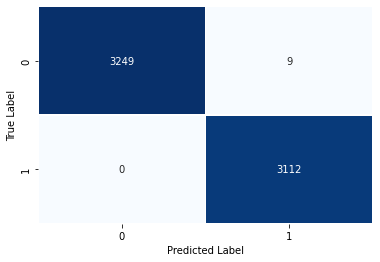

In [ ]:
acc_svm = c_report(y_test,predictions_SVM)
plot_cm(y_test,predictions_SVM)

In [ ]:
print_confusion_matrix(y_test, predictions_SVM)

True positive =  3112
False positive =  9
False negative =  0
True negative =  3249
Trrue positive rate = 1.0
Trrue negative rate = 0.9972375690607734
Positive Predictive Value = 0.9971163088753605
Negative Predictive Value = 1.0
False positive rate = 0.0027624309392265192
False negative rate = 0.0
False discovery rate = 0.0028836911246395386
Accuracy = 0.9985871271585557
F1 score = 0.9565083755955125


In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

roc_auc_score for Support Vector Classifier:  0.9986187845303867


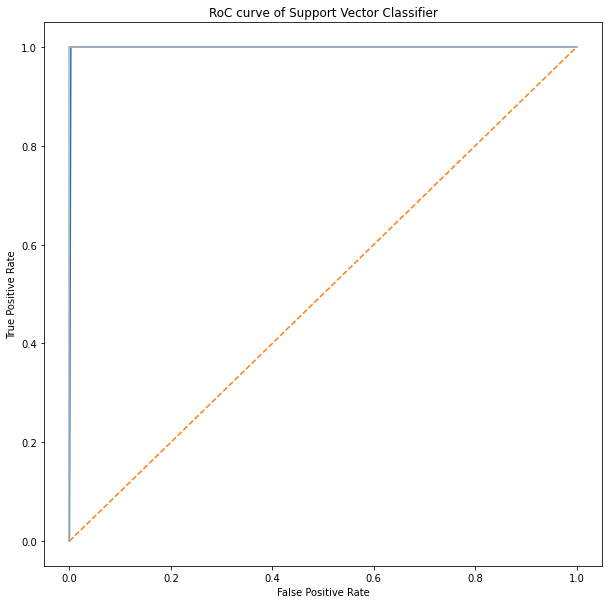

In [ ]:
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, predictions_SVM)
print('roc_auc_score for Support Vector Classifier: ', roc_auc_score(y_test, predictions_SVM))
plt.subplots(1, figsize=(10,10))
plt.title('RoC curve of Support Vector Classifier')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# **MultinomialNaive Bayes**

In [ ]:
from sklearn.naive_bayes import MultinomialNB

The accuracy of the Naive Bayes is 98.92


Text(0.5, 1.05, 'Confusion_matrix')

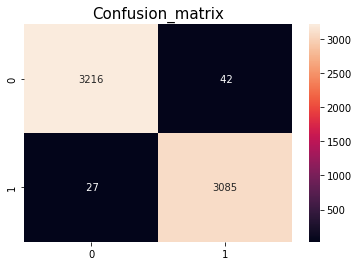

In [ ]:
mnb=MultinomialNB(alpha = 0.7)
predictions_mNB=mnb.fit(X_train, y_train).predict(X_test)
acc_mNB = round(accuracy_score(predictions_mNB,y_test)*100,2)
print('The accuracy of the Naive Bayes is',acc_mNB)
sns.heatmap(confusion_matrix(y_test,predictions_mNB),annot=True,fmt='3.0f')
plt.title('Confusion_matrix', y=1.05, size=15)

Classifictaion Report
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      3258
         1.0       0.99      0.99      0.99      3112

    accuracy                           0.99      6370
   macro avg       0.99      0.99      0.99      6370
weighted avg       0.99      0.99      0.99      6370

Accuracy : 0.9891679748822606


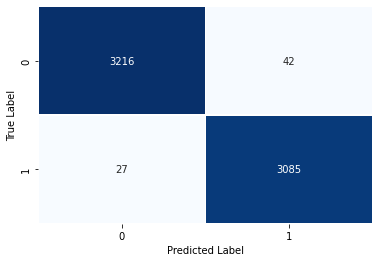

In [ ]:
acc_mNB = c_report(y_test,predictions_mNB)
plot_cm(y_test,predictions_mNB)

In [ ]:
print_confusion_matrix(y_test, predictions_mNB)

True positive =  3085
False positive =  42
False negative =  27
True negative =  3216
Trrue positive rate = 0.9913239074550129
Trrue negative rate = 0.9871086556169429
Positive Predictive Value = 0.986568596098497
Negative Predictive Value = 0.9916743755781684
False positive rate = 0.01289134438305709
False negative rate = 0.008676092544987147
False discovery rate = 0.013431403901503039
Accuracy = 0.9891679748822606
F1 score = 0.9490847561913551


roc_auc_score for Multinomial Naive Bayes Classification:  0.989216281535978


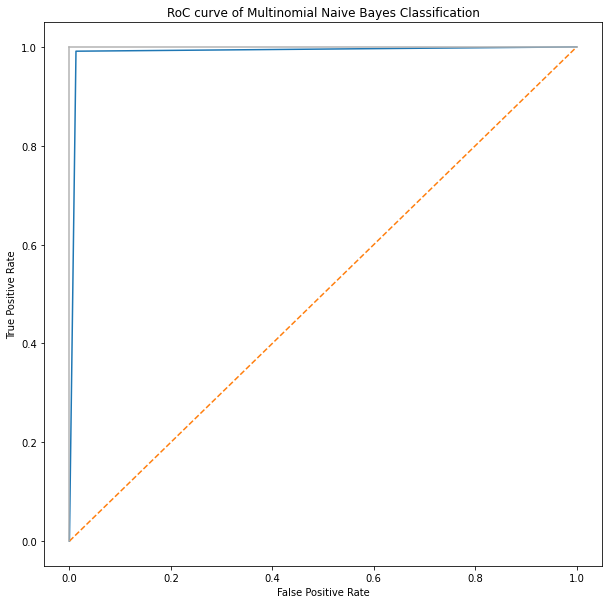

In [ ]:
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, predictions_mNB)
print('roc_auc_score for Multinomial Naive Bayes Classification: ', roc_auc_score(y_test, predictions_mNB))
plt.subplots(1, figsize=(10,10))
plt.title('RoC curve of Multinomial Naive Bayes Classification')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# **Decision Tree**

The accuracy of the Decision Tree is 99.54


Text(0.5, 1.05, 'Confusion_matrix')

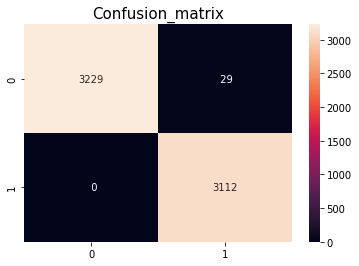

In [ ]:
#Decision Tree
dtree=DecisionTreeClassifier()
predictions_DT=dtree.fit(X_train, y_train).predict(X_test)
acc_DT = round(accuracy_score(predictions_DT,y_test)*100,2)
print('The accuracy of the Decision Tree is',acc_DT)
sns.heatmap(confusion_matrix(y_test,predictions_DT),annot=True,fmt='3.0f')
plt.title('Confusion_matrix', y=1.05, size=15)

Classifictaion Report
              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00      3258
         1.0       0.99      1.00      1.00      3112

    accuracy                           1.00      6370
   macro avg       1.00      1.00      1.00      6370
weighted avg       1.00      1.00      1.00      6370

Accuracy : 0.9954474097331241


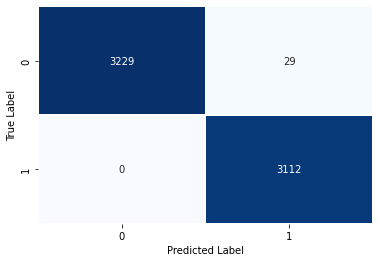

In [ ]:
acc_DT = c_report(y_test,predictions_DT)
plot_cm(y_test,predictions_DT)

In [ ]:
print_confusion_matrix(y_test, predictions_DT)

True positive =  3112
False positive =  29
False negative =  0
True negative =  3229
Trrue positive rate = 1.0
Trrue negative rate = 0.9910988336402701
Positive Predictive Value = 0.9907672715695638
Negative Predictive Value = 1.0
False positive rate = 0.008901166359729895
False negative rate = 0.0
False discovery rate = 0.009232728430436167
Accuracy = 0.9954474097331241
F1 score = 0.9594573762910437


roc_auc_score for Decision Tree Classification:  0.995549416820135


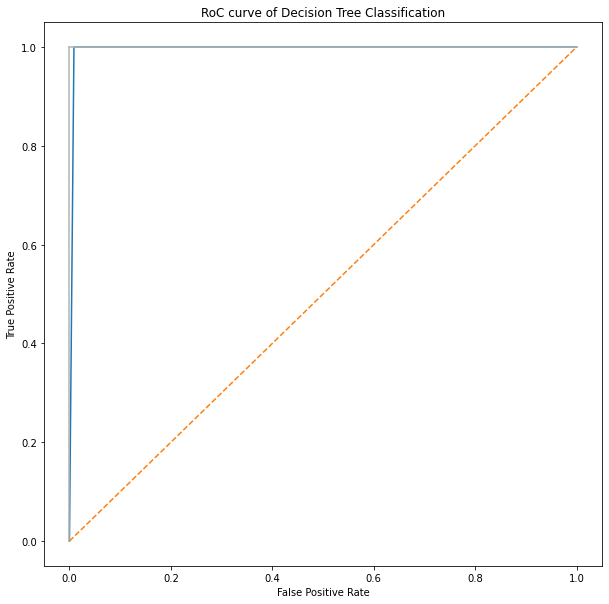

In [ ]:
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, predictions_DT)
print('roc_auc_score for Decision Tree Classification: ', roc_auc_score(y_test, predictions_DT))
plt.subplots(1, figsize=(10,10))
plt.title('RoC curve of Decision Tree Classification')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# **Logistic Regression**

The accuracy of the Logistic Regression is 99.78


Text(0.5, 1.05, 'Confusion_matrix')

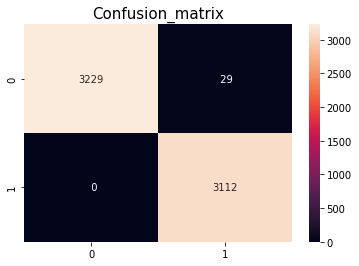

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
predictions_LgR = logreg.fit(X_train, y_train).predict(X_test)
acc_LgR = round(accuracy_score(predictions_LgR,y_test)*100,2)
print('The accuracy of the Logistic Regression is', acc_LgR)
sns.heatmap(confusion_matrix(y_test,predictions_DT),annot=True,fmt='3.0f')
plt.title('Confusion_matrix', y=1.05, size=15)

Classifictaion Report
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      3258
         1.0       1.00      1.00      1.00      3112

    accuracy                           1.00      6370
   macro avg       1.00      1.00      1.00      6370
weighted avg       1.00      1.00      1.00      6370

Accuracy : 0.9978021978021978


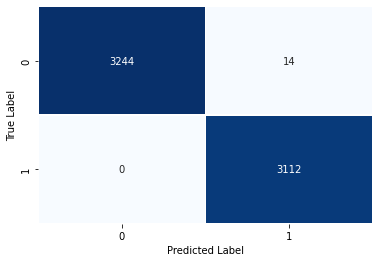

In [ ]:
acc_LgR = c_report(y_test,predictions_LgR)
plot_cm(y_test,predictions_LgR)

In [ ]:
print_confusion_matrix(y_test, predictions_LgR)

True positive =  3112
False positive =  14
False negative =  0
True negative =  3244
Trrue positive rate = 1.0
Trrue negative rate = 0.9957028852056476
Positive Predictive Value = 0.9955214331413947
Negative Predictive Value = 1.0
False positive rate = 0.004297114794352364
False negative rate = 0.0
False discovery rate = 0.004478566858605247
Accuracy = 0.9978021978021978
F1 score = 0.9572439249461704


roc_auc_score for Logistic Regression:  0.9978514426028239


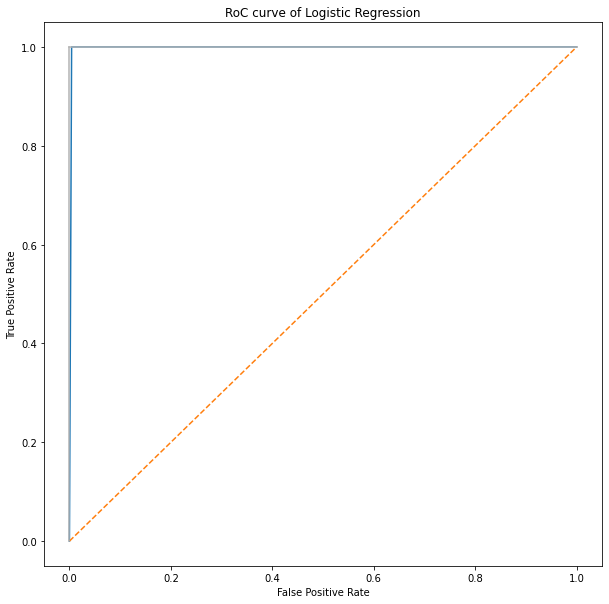

In [ ]:
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, predictions_LgR)
print('roc_auc_score for Logistic Regression: ', roc_auc_score(y_test, predictions_LgR))
plt.subplots(1, figsize=(10,10))
plt.title('RoC curve of Logistic Regression')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# **Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

The accuracy of the Random Forest Classifier is 99.64


Text(0.5, 1.05, 'Confusion_matrix')

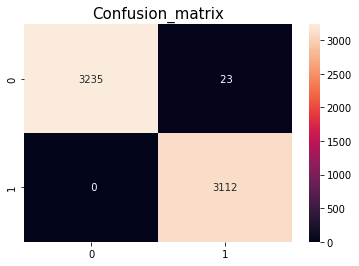

In [ ]:
RFC = RandomForestClassifier()
predictions_RFC= RFC.fit(X_train, y_train).predict(X_test)
acc_RFC = round(accuracy_score(predictions_RFC,y_test)*100,2)
print('The accuracy of the Random Forest Classifier is',acc_RFC)
sns.heatmap(confusion_matrix(y_test,predictions_RFC),annot=True,fmt='3.0f')
plt.title('Confusion_matrix', y=1.05, size=15)

Classifictaion Report
              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00      3258
         1.0       0.99      1.00      1.00      3112

    accuracy                           1.00      6370
   macro avg       1.00      1.00      1.00      6370
weighted avg       1.00      1.00      1.00      6370

Accuracy : 0.9963893249607535


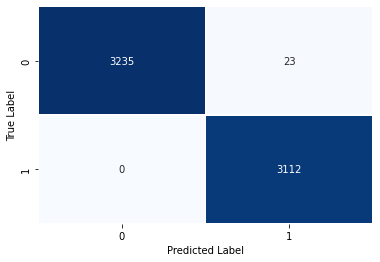

In [ ]:
acc_RFC = c_report(y_test,predictions_RFC)
plot_cm(y_test,predictions_RFC)

In [ ]:
print_confusion_matrix(y_test, predictions_RFC)

True positive =  3112
False positive =  23
False negative =  0
True negative =  3235
Trrue positive rate = 1.0
Trrue negative rate = 0.9929404542664211
Positive Predictive Value = 0.9926634768740031
Negative Predictive Value = 1.0
False positive rate = 0.007059545733578883
False negative rate = 0.0
False discovery rate = 0.00733652312599681
Accuracy = 0.9963893249607535
F1 score = 0.9585707685199446


roc_auc_score for Random Forest Classification:  0.9964702271332105


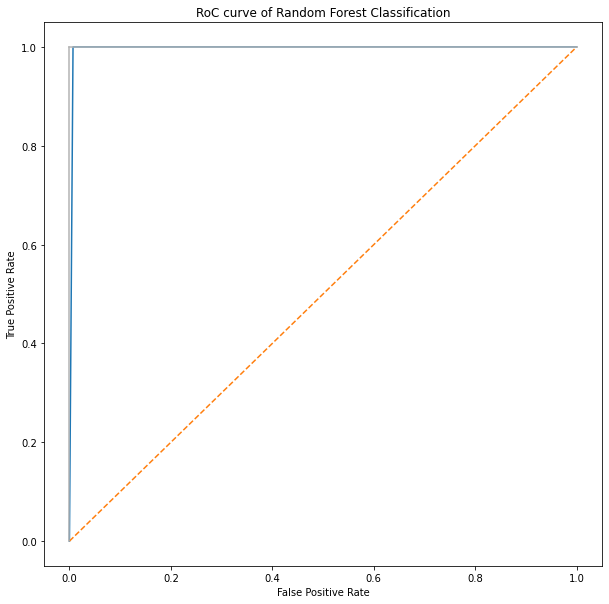

In [ ]:
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, predictions_RFC)
print('roc_auc_score for Random Forest Classification: ', roc_auc_score(y_test, predictions_RFC))
plt.subplots(1, figsize=(10,10))
plt.title('RoC curve of Random Forest Classification')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# **GradientBoosting Classifier**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

The accuracy of the Gradient Boosting Classifier is 98.35


Text(0.5, 1.05, 'Confusion_matrix')

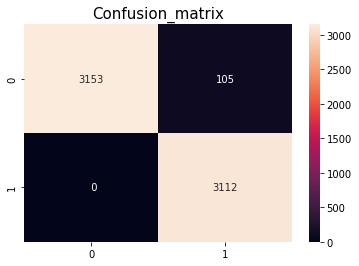

In [ ]:
XGB = GradientBoostingClassifier()
predictions_XGB= XGB.fit(X_train, y_train).predict(X_test)
acc_XGB = round(accuracy_score(predictions_XGB,y_test)*100,2)
print('The accuracy of the Gradient Boosting Classifier is', acc_XGB)
sns.heatmap(confusion_matrix(y_test,predictions_XGB),annot=True,fmt='3.0f')
plt.title('Confusion_matrix', y=1.05, size=15)

Classifictaion Report
              precision    recall  f1-score   support

         0.0       1.00      0.97      0.98      3258
         1.0       0.97      1.00      0.98      3112

    accuracy                           0.98      6370
   macro avg       0.98      0.98      0.98      6370
weighted avg       0.98      0.98      0.98      6370

Accuracy : 0.9835164835164835


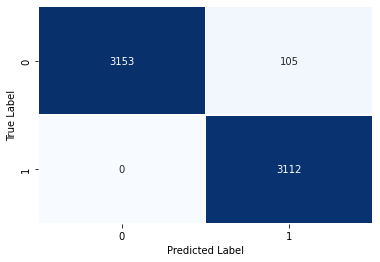

In [ ]:
acc_XGB = c_report(y_test,predictions_XGB)
plot_cm(y_test,predictions_XGB)

In [ ]:
print_confusion_matrix(y_test, predictions_XGB)

True positive =  3112
False positive =  105
False negative =  0
True negative =  3153
Trrue positive rate = 1.0
Trrue negative rate = 0.9677716390423573
Positive Predictive Value = 0.9673608952440161
Negative Predictive Value = 1.0
False positive rate = 0.03222836095764273
False negative rate = 0.0
False discovery rate = 0.03263910475598383
Accuracy = 0.9835164835164835
F1 score = 0.970831383559507


roc_auc_score for Gradient Boosting Classifier:  0.9838858195211787


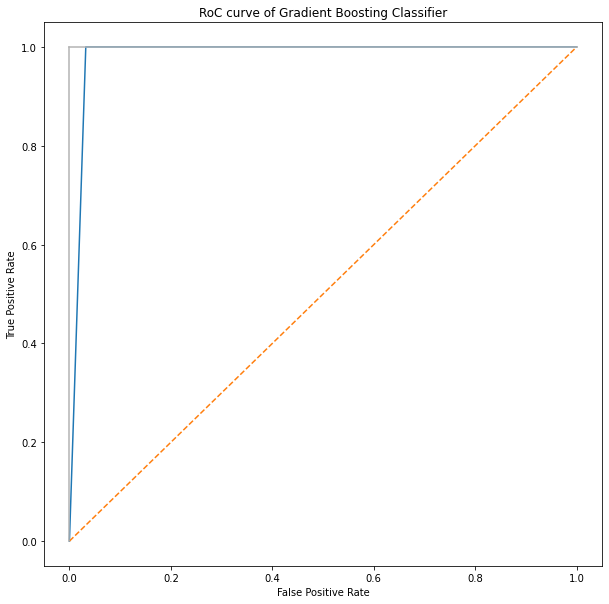

In [ ]:
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, predictions_XGB)
print('roc_auc_score for Gradient Boosting Classifier: ', roc_auc_score(y_test, predictions_XGB))
plt.subplots(1, figsize=(10,10))
plt.title('RoC curve of Gradient Boosting Classifier')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# **Cat Boost Algorithm**

In [ ]:
! pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.2 MB/s 


In [ ]:
from catboost import CatBoostClassifier

Learning rate set to 0.041054
0:	learn: 0.6116802	total: 67.4ms	remaining: 1m 7s
1:	learn: 0.5413794	total: 82.3ms	remaining: 41.1s
2:	learn: 0.4903842	total: 97.4ms	remaining: 32.4s
3:	learn: 0.4405519	total: 112ms	remaining: 27.9s
4:	learn: 0.4059165	total: 127ms	remaining: 25.3s
5:	learn: 0.3693549	total: 143ms	remaining: 23.7s
6:	learn: 0.3425818	total: 158ms	remaining: 22.4s
7:	learn: 0.3210561	total: 173ms	remaining: 21.5s
8:	learn: 0.3032748	total: 188ms	remaining: 20.7s
9:	learn: 0.2857942	total: 204ms	remaining: 20.2s
10:	learn: 0.2708731	total: 219ms	remaining: 19.7s
11:	learn: 0.2580149	total: 235ms	remaining: 19.3s
12:	learn: 0.2456979	total: 250ms	remaining: 19s
13:	learn: 0.2351782	total: 270ms	remaining: 19s
14:	learn: 0.2257348	total: 287ms	remaining: 18.8s
15:	learn: 0.2160356	total: 303ms	remaining: 18.6s
16:	learn: 0.2058342	total: 319ms	remaining: 18.4s
17:	learn: 0.1993543	total: 334ms	remaining: 18.2s
18:	learn: 0.1908756	total: 357ms	remaining: 18.4s
19:	learn: 0

Text(0.5, 1.05, 'Confusion_matrix')

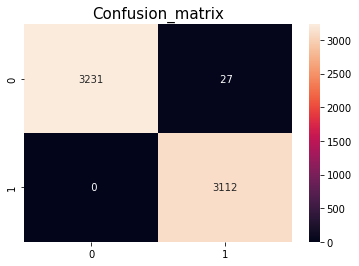

In [ ]:
CBC = CatBoostClassifier()
predictions_CBC= CBC.fit(X_train, y_train).predict(X_test)
acc_CBC = round(accuracy_score(predictions_CBC,y_test)*100,2)
print('The accuracy of the carBoost Classifier is', acc_CBC)
sns.heatmap(confusion_matrix(y_test,predictions_CBC),annot=True,fmt='3.0f')
plt.title('Confusion_matrix', y=1.05, size=15)

Classifictaion Report
              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00      3258
         1.0       0.99      1.00      1.00      3112

    accuracy                           1.00      6370
   macro avg       1.00      1.00      1.00      6370
weighted avg       1.00      1.00      1.00      6370

Accuracy : 0.9957613814756672


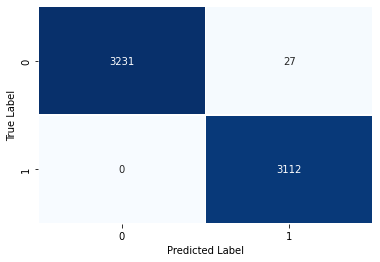

In [ ]:
acc_CBC = c_report(y_test,predictions_CBC)
plot_cm(y_test,predictions_CBC)

In [ ]:
print_confusion_matrix(y_test, predictions_CBC)

True positive =  3112
False positive =  27
False negative =  0
True negative =  3231
Trrue positive rate = 1.0
Trrue negative rate = 0.9917127071823204
Positive Predictive Value = 0.9913985345651481
Negative Predictive Value = 1.0
False positive rate = 0.008287292817679558
False negative rate = 0.0
False discovery rate = 0.008601465434851864
Accuracy = 0.9957613814756672
F1 score = 0.9591616581907844


roc_auc_score for Cat Boost Classification:  0.9958563535911602


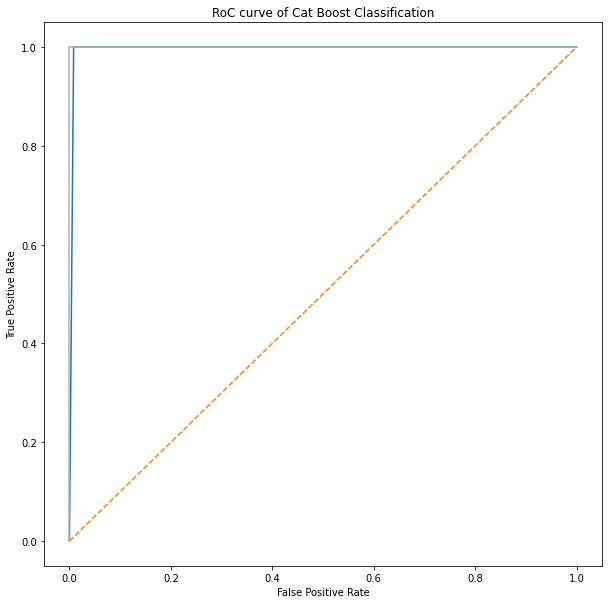

In [ ]:
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, predictions_CBC)
print('roc_auc_score for Cat Boost Classification: ', roc_auc_score(y_test, predictions_CBC))
plt.subplots(1, figsize=(10,10))
plt.title('RoC curve of Cat Boost Classification')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# **Ensemble Model ( XGB + MNB + LR)**

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
NB  = MultinomialNB()
XGB = GradientBoostingClassifier()

The accuracy of the voting Classifier is 99.31


Text(0.5, 1.05, 'Confusion_matrix')

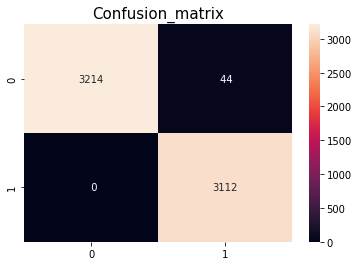

In [ ]:
estimators = []
estimators.append(('LR', 
                  LogisticRegression()))
estimators.append(('mNB', MultinomialNB()))
estimators.append(('XBG', GradientBoostingClassifier()))


VC = VotingClassifier(estimators=estimators,voting='soft')
predictions_VC= VC.fit(X_train, y_train).predict(X_test)
acc_VC = round(accuracy_score(predictions_VC,y_test)*100,2)
print('The accuracy of the voting Classifier is', acc_VC)
sns.heatmap(confusion_matrix(y_test,predictions_VC),annot=True,fmt='3.0f')
plt.title('Confusion_matrix', y=1.05, size=15)

Classifictaion Report
              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99      3258
         1.0       0.99      1.00      0.99      3112

    accuracy                           0.99      6370
   macro avg       0.99      0.99      0.99      6370
weighted avg       0.99      0.99      0.99      6370

Accuracy : 0.9930926216640502


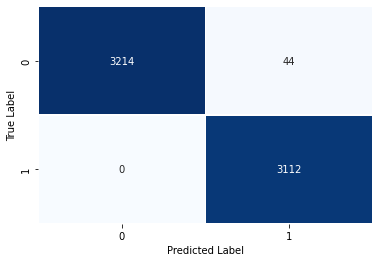

In [ ]:
acc_VC = c_report(y_test,predictions_VC)
plot_cm(y_test,predictions_VC)

In [ ]:
print_confusion_matrix(y_test, predictions_VC)

True positive =  3112
False positive =  44
False negative =  0
True negative =  3214
Trrue positive rate = 1.0
Trrue negative rate = 0.9864947820748926
Positive Predictive Value = 0.9860583016476553
Negative Predictive Value = 1.0
False positive rate = 0.013505217925107428
False negative rate = 0.0
False discovery rate = 0.01394169835234474
Accuracy = 0.9930926216640502
F1 score = 0.9616810877626699


roc_auc_score for Ensemble Classification:  0.9932473910374463


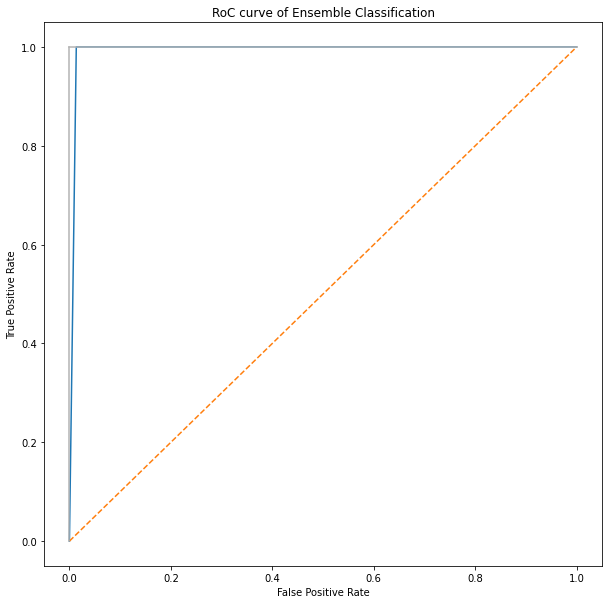

In [ ]:
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, predictions_VC)
print('roc_auc_score for Ensemble Classification: ', roc_auc_score(y_test, predictions_VC))
plt.subplots(1, figsize=(10,10))
plt.title('RoC curve of Ensemble Classification')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# **Ensemble Model ( RF + CBC)**

Learning rate set to 0.041054
0:	learn: 0.6116802	total: 15.7ms	remaining: 15.7s
1:	learn: 0.5413794	total: 30.8ms	remaining: 15.4s
2:	learn: 0.4903842	total: 44.9ms	remaining: 14.9s
3:	learn: 0.4405519	total: 59.9ms	remaining: 14.9s
4:	learn: 0.4059165	total: 81.4ms	remaining: 16.2s
5:	learn: 0.3693549	total: 99.3ms	remaining: 16.5s
6:	learn: 0.3425818	total: 114ms	remaining: 16.2s
7:	learn: 0.3210561	total: 129ms	remaining: 16s
8:	learn: 0.3032748	total: 144ms	remaining: 15.9s
9:	learn: 0.2857942	total: 160ms	remaining: 15.8s
10:	learn: 0.2708731	total: 175ms	remaining: 15.7s
11:	learn: 0.2580149	total: 190ms	remaining: 15.6s
12:	learn: 0.2456979	total: 205ms	remaining: 15.6s
13:	learn: 0.2351782	total: 223ms	remaining: 15.7s
14:	learn: 0.2257348	total: 238ms	remaining: 15.6s
15:	learn: 0.2160356	total: 253ms	remaining: 15.6s
16:	learn: 0.2058342	total: 268ms	remaining: 15.5s
17:	learn: 0.1993543	total: 283ms	remaining: 15.5s
18:	learn: 0.1908756	total: 298ms	remaining: 15.4s
19:	lea

Text(0.5, 1.05, 'Confusion_matrix')

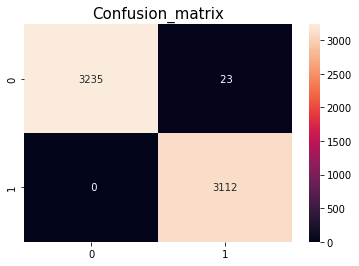

In [ ]:
estimators = []
estimators.append(('RF', RandomForestClassifier()))
estimators.append(('CBC', 
                  CatBoostClassifier()))


VC_1 = VotingClassifier(estimators=estimators,voting='soft')
predictions_VC_1= VC_1.fit(X_train, y_train).predict(X_test)
acc_VC_1 = round(accuracy_score(predictions_VC_1,y_test)*100,2)
print('The accuracy of the voting Classifier is', acc_VC_1)
sns.heatmap(confusion_matrix(y_test,predictions_VC_1),annot=True,fmt='3.0f')
plt.title('Confusion_matrix', y=1.05, size=15)

Classifictaion Report
              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00      3258
         1.0       0.99      1.00      1.00      3112

    accuracy                           1.00      6370
   macro avg       1.00      1.00      1.00      6370
weighted avg       1.00      1.00      1.00      6370

Accuracy : 0.9963893249607535


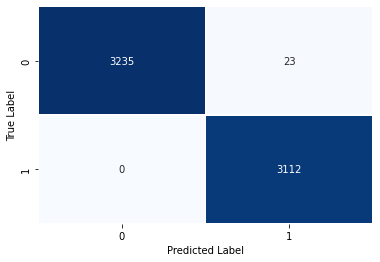

In [ ]:
acc_VC_1 = c_report(y_test,predictions_VC_1)
plot_cm(y_test,predictions_VC_1)

In [ ]:
print_confusion_matrix(y_test, predictions_VC_1)

True positive =  3112
False positive =  23
False negative =  0
True negative =  3235
Trrue positive rate = 1.0
Trrue negative rate = 0.9929404542664211
Positive Predictive Value = 0.9926634768740031
Negative Predictive Value = 1.0
False positive rate = 0.007059545733578883
False negative rate = 0.0
False discovery rate = 0.00733652312599681
Accuracy = 0.9963893249607535
F1 score = 0.9585707685199446


roc_auc_score for vote based Classification:  0.9964702271332105


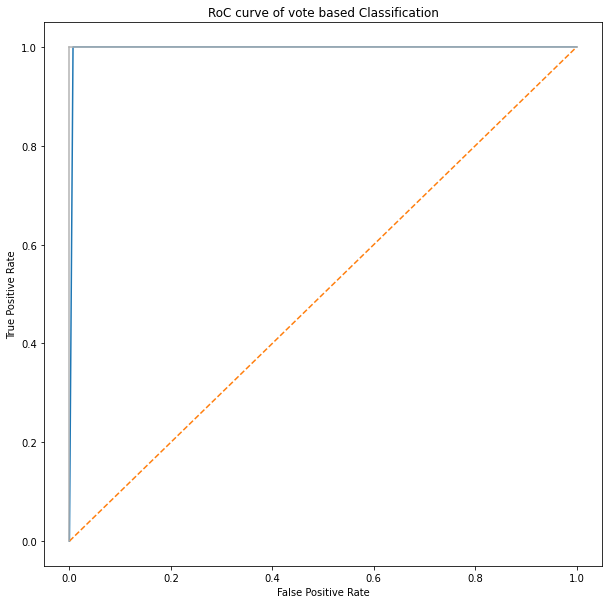

In [ ]:
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, predictions_VC_1)
print('roc_auc_score for vote based Classification: ', roc_auc_score(y_test, predictions_VC_1))
plt.subplots(1, figsize=(10,10))
plt.title('RoC curve of vote based Classification')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
results = pd.DataFrame ([["Logistic Regression", acc_LgR],["RandomForest Classification ", acc_RFC],["Multinomial Naive Bayes", acc_mNB], ["Decision Tree Classifier", acc_DT], ["Support Vector Classification", acc_svm], ["Gradient Boosting Classifier", acc_XGB], ["Cat Boost Classification", acc_CBC], ["Voting Based Classification-LR+NB+XBG]",acc_VC],["Voting Based Classification_1-CAT+RF]",acc_VC_1]], columns = ["Models","Accuracy Score"]).sort_values(by='Accuracy Score',ascending=False)


In [ ]:
results.style.background_gradient(cmap='Greens')

,Models,Accuracy Score
4,Support Vector Classification,0.998587
0,Logistic Regression,0.997802
1,RandomForest Classification,0.996389
8,Voting Based Classification_1-CAT+RF],0.996389
6,Cat Boost Classification,0.995761
3,Decision Tree Classifier,0.995447
7,Voting Based Classification-LR+NB+XBG],0.993093
2,Multinomial Naive Bayes,0.989168
5,Gradient Boosting Classifier,0.983516
